# The k-Armed Bandit Problem

## Action-Value Methods
The true value of an action is the mean reward when that action is selected. One natural way to estimate this is by averaging the rewards actually received.

### Nonstationary Bandit (Sutton-Barto 2.4)
But the averaging method only makes sense if the bandit is stationary If the expected value of the actions of the bandit change over time then it makes sense to weight recent rewards more heavily than long-past ones. One of the most popular ways of doing this is to use a constant step-size parameter. 
 - Qn+1 = Qn + α[Rn − Qn],
 where the step-size parameter α ∈ (0, 1] is constant.


The second condition of convergence (summation of the series of alpha squared) is not met, indicating that the estimates never completely converge but continue to vary in response to the most recently received rewards; this is actually desirable in a nonstationary environment.

Exercise 2.3 (programming) Design and conduct an experiment to demonstrate
the difficulties that sample-average methods have for nonstationary problems. Use a
modified version of the 10-armed testbed in which all the q∗(a) start out equal and
then take independent random walks. Prepare plots like Figure 2.2 for an actionvalue
method using sample averages, incrementally computed by α = 1/n, and another
action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and,
if necessary, runs longer than 1000 steps

### Nonstationary bandits testbed

Create a set of 2000 randomly generated 10-armed bandit models with equal value for all actions.
Each row stores the model of one k-armed bandit (a slot machine with k arms), each cell in the row stores the true Expected value of the reward given by each of the k possible actions that the agent (player) can do on the bandit (pull one of the k levers), this true expected value (true mean) starts equal for all actions nat start changing with brownian motion. 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 2000
k = 10
models = np.zeros(shape=(n, k))

models[0:1,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [3]:
def model_random_walk(i):
    models[i,:] += np.random.normal(size=(k))

model_random_walk(0)
models[0:1,:]

array([[-0.82836506,  1.20782604, -0.83646078,  0.40887938, -0.17423901,
        -1.32608101, -1.32964007,  0.48423321,  0.43460239,  0.03284972]])

The actual reward from a bandit is stochastic, the algorithm learns a model of the Expected reward, and the actual reward is random with q∗(At) as mean (expectation) and variance 1.

In [4]:
# the bandit returns the actual reward from the true model
def bandit(row, a):
    r = models[row, a] + np.random.normal()
    return r

### Reward Optimization method: epsilon-greedy

In [5]:
# ε-greedy method
def epsilon_greedy(Q, epsilon):
    a =  np.random.choice(range(10)) if np.random.sample() < epsilon else np.argmax(Q)
    return a

### Action value estimation methods: average vs contant-step

The estimator of the action values is the averages of the observed rewards for each action.
To compute these estimators with minimum computational cost, we apply an incremental formula for updating averages with small, constant computation required to process
each new reward.

In [6]:
def update_rule(old_estimate, target, step_size):
    new_estimate = old_estimate + step_size * (target - old_estimate)
    return new_estimate

#### Part 1: average update rule

In [7]:
Qs = np.zeros(shape=(n, k))
num_steps = 5000
epsilon = .01
 
# ratio for plotting performance
ratio_est_vs_opt = np.zeros(shape=(n, num_steps))

# for each model
for i in range(n):
    N = np.zeros(k) # action_counters
    # accumulators for plotting performance
    rewards_accum = 0
    opt_rewards_accum = 0
    # 1 run
    for t in range(num_steps):       
        # estimate best action, based on estimated action-values, with epsilon-greedy method
        a = epsilon_greedy(Qs[i,:], epsilon)
        
        # simulate the brownian motion of the model
        model_random_walk(i)
        
        # act and collect the actual reward from the bandit
        reward = bandit(i, a)

        # update our estimate of the action value 
        N[a] += 1
        Qs[i, a] = update_rule(Qs[i, a], reward, 1/N[a])
              
        # store the ratio of epsilon-greedy vs optimal at each step for plotting
        rewards_accum += reward
        opt_rewards_accum += bandit(i, np.argmax(models[i, :]))
        ratio_est_vs_opt[i, t] = rewards_accum / opt_rewards_accum
        #print i, q_opt[i], a, opt_rewards_accum, rewards_accum, ratio_est_vs_opt[i, t]
    #print
# average performance over all models
avg_ratio_all_models = np.mean(ratio_est_vs_opt, 0) # mean along rows (avg of each step over all models)

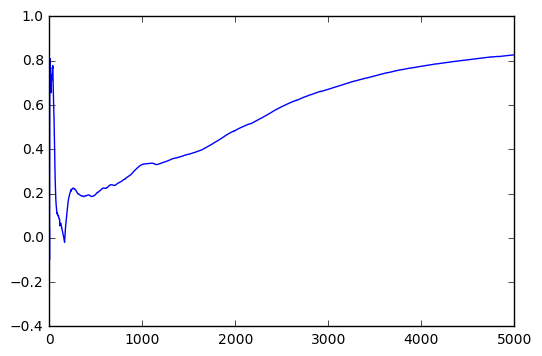

In [8]:
plt.plot(ratio_est_vs_opt[0,:])

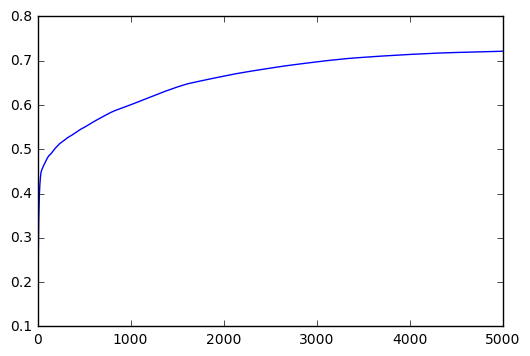

In [9]:
plt.plot(avg_ratio_all_models)

#### Part 2: update rule ( constant step-size)

In [10]:
models = np.zeros(shape=(n, k))
Qs = np.zeros(shape=(n, k))
num_steps = 5000
epsilon = .01

# constant step-size
alpha = 0.1
 
# ratio for plotting performance
ratio_est_vs_opt = np.zeros(shape=(n, num_steps))

# for each model
for i in range(n):
    # accumulators for plotting performance
    rewards_accum = 0
    opt_rewards_accum = 0
    # 1 run
    for t in range(num_steps):       
        # estimate best action, based on estimated action-values, with epsilon-greedy method
        a = epsilon_greedy(Qs[i,:], epsilon)
        
        # simulate the brownian motion of the model
        model_random_walk(i)
        
        # act and collect the actual reward from the bandit
        reward = bandit(i, a)

        # update our estimate of the action value 
        Qs[i, a] = update_rule(Qs[i, a], reward, alpha)
              
        # store the ratio of epsilon-greedy vs optimal at each step for plotting
        rewards_accum += reward
        opt_rewards_accum += bandit(i, np.argmax(models[i, :]))
        ratio_est_vs_opt[i, t] = rewards_accum / opt_rewards_accum

# average performance over all models
avg_ratio_all_models = np.mean(ratio_est_vs_opt, 0) # mean along rows (avg of each step over all models)

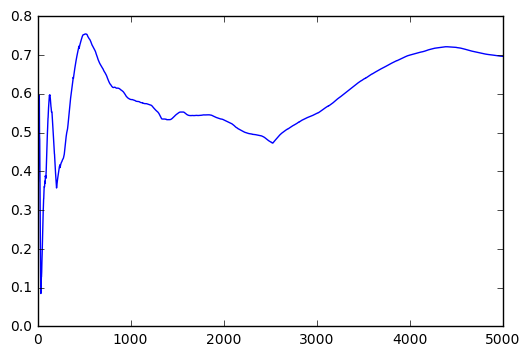

In [11]:
plt.plot(ratio_est_vs_opt[0,:])

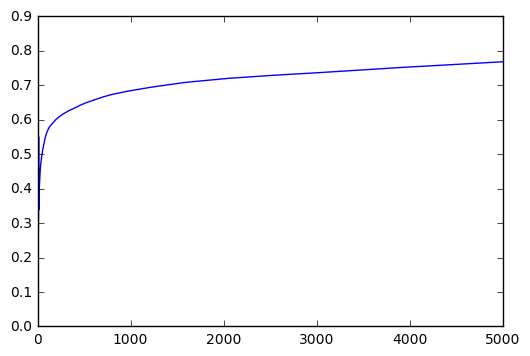

In [12]:
plt.plot(avg_ratio_all_models)